In [96]:
#  data analysis

import pandas as pd

file_path = '..\\data\\combined_data.csv'

df = pd.read_csv(file_path, sep =",")
df.tail()  # Display the first few rows of the DataFrame.
df["Genus_Species"] = df["genus"].astype(str) + " " + df["species"].astype(str)


C:\Users\mandr\AppData\Local\Temp\ipykernel_9276\4099038586.py:7: DtypeWarning:

Columns (5,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [2]:
print(df.describe(include='all'))

num_columns = df.shape[1]
print(f"Number of columns: {num_columns}")

        plant_name_id   ipni_id taxon_rank taxon_status      family  \
count    1.970252e+06   1960653    1970249      1970252     1970252   
unique            NaN    437357         10            3         458   
top               NaN  327729-2    Species     Accepted  Asteraceae   
freq              NaN       348    1354957      1956990      187035   
mean     1.856871e+06       NaN        NaN          NaN         NaN   
std      1.259661e+06       NaN        NaN          NaN         NaN   
min      1.000000e+00       NaN        NaN          NaN         NaN   
25%      3.716560e+05       NaN        NaN          NaN         NaN   
50%      2.506930e+06       NaN        NaN          NaN         NaN   
75%      2.910966e+06       NaN        NaN          NaN         NaN   
max      3.310951e+06       NaN        NaN          NaN         NaN   

       genus_hybrid    genus species_hybrid   species infraspecific_rank  ...  \
count          1137  1970252          21019   1635064             

In [3]:
# Display data types of each column
print(df.dtypes)

print("")

# Check if columns are nullable
nullability = df.isnull().any()
print(nullability)

plant_name_id                int64
ipni_id                     object
taxon_rank                  object
taxon_status                object
family                      object
genus_hybrid                object
genus                       object
species_hybrid              object
species                     object
infraspecific_rank          object
infraspecies                object
parenthetical_author        object
primary_author              object
publication_author          object
place_of_publication        object
volume_and_page             object
first_published             object
nomenclatural_remarks       object
geographic_area             object
lifeform_description        object
climate_description         object
taxon_name                  object
taxon_authors               object
accepted_plant_name_id     float64
basionym_plant_name_id     float64
replaced_synonym_author     object
homotypic_synonym          float64
parent_plant_name_id       float64
powo_id             

In [ ]:
def calculate_taxonomic_diversity(data):
    # Calculate number of unique species, genera, families
    num_species = data['species'].nunique()
    num_genera = data['genus'].nunique()
    num_families = data['family'].nunique()
    return {
        'species': num_species,
        'genera': num_genera,
        'families': num_families
    }


def analyze_geographic_distribution(data):
    # Count species per region
    distribution = data.groupby('region')['species'].nunique().reset_index()
    return distribution.to_dict(orient='records')

In [5]:
analyze_geographic_distribution(df)

[{'region': 'Antarctic Continent', 'species': 4},
 {'region': 'Arabian Peninsula', 'species': 2455},
 {'region': 'Australia', 'species': 11479},
 {'region': 'Brazil', 'species': 16069},
 {'region': 'Caribbean', 'species': 6864},
 {'region': 'Caucasus', 'species': 4220},
 {'region': 'Central America', 'species': 10362},
 {'region': 'China', 'species': 16250},
 {'region': 'East Tropical Africa', 'species': 7006},
 {'region': 'Eastern Asia', 'species': 6600},
 {'region': 'Eastern Canada', 'species': 2351},
 {'region': 'Eastern Europe', 'species': 4378},
 {'region': 'Indian Subcontinent', 'species': 10769},
 {'region': 'Indo-China', 'species': 10526},
 {'region': 'Macaronesia', 'species': 2498},
 {'region': 'Malesia', 'species': 14276},
 {'region': 'Mexico', 'species': 11782},
 {'region': 'Middle Asia', 'species': 5541},
 {'region': 'Middle Atlantic Ocean', 'species': 478},
 {'region': 'Middle Europe', 'species': 6563},
 {'region': 'Mongolia', 'species': 2061},
 {'region': 'New Zealand', '

In [ ]:
species_per_region = df.groupby('area')['plant_name_id'].nunique().reset_index()
species_per_region.columns = ['area', 'species_count']
import plotly.express as px
import nbformat

# Create a choropleth map
fig = px.choropleth(
    species_per_region,
    locations="area",  # Column with region names
    locationmode="country names",  # Use country names for mapping
    color="species_count",  # Column to determine color intensity
    hover_name="area",  # Column to display on hover
    title="Species Distribution by area of the WCVP database",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the map
fig.show()


In [12]:
families_per_region = df.groupby('area')['family'].nunique().reset_index()
families_per_region.columns = ['area', 'family_count']
import plotly.express as px
import kaleido

# Create a choropleth map
fig = px.choropleth(
    families_per_region,
    locations="area",  # Column with region names
    locationmode="country names",  # Use country names for mapping
    color="family_count",  # Column to determine color intensity
    hover_name="area",  # Column to display on hover
    title="Family Distribution by area of the WCVP database",
    color_continuous_scale=px.colors.sequential.Viridis
)

# Show the map
fig.show()

In [13]:
introduced_species = df.groupby('area')['introduced'].sum().reset_index()
introduced_species.columns = ['area', 'introduced_species_count']
import plotly.express as px
import nbformat

# Create a choropleth map
fig = px.choropleth(
    introduced_species,
    locations="area",  # Column with region names
    locationmode="country names",  # Use country names for mapping
    color="introduced_species_count",  # Column to determine color intensity
    hover_name="area",  # Column to display on hover
    title="introduced_species Distribution by area of the WCVP database",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the map
fig.show()

In [14]:
# Identify the most introduced species
introduced_species_counts = df[df["introduced"] == 1].groupby("Genus_Species")["Genus_Species"].count()

most_introduced_species = introduced_species_counts.idxmax()
most_introduced_count = introduced_species_counts.max()

most_introduced_species, most_introduced_count

('Raphanus raphanistrum', np.int64(499))

In [15]:

import matplotlib.pyplot as plt

# Sort data for better visualization
species_counts_per_family_sorted = species_counts_per_family.sort_values(by="Total_Species_Count", ascending=False)
top_10_species_counts = species_counts_per_family_sorted.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_species_counts["family"], top_10_species_counts["Total_Species_Count"])
plt.xlabel("Family")
plt.ylabel("Total Species Count")
plt.title("Total Species Count per Family")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



NameError: name 'species_counts_per_family' is not defined

In [ ]:
analyze_geographic_distribution(df)


In [16]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

#Print the unique values for each column

for column, values in unique_values.items():
    if column == 'region':
        print(f"Column '{column}' has unique values: {values}")

#(showing up to 10)
# for column, values in unique_values.items():
#     print(f"Column '{column}' \n has unique values: {values[:10]} ")


Column 'region' has unique values: ['Australia' 'Mexico' 'South-Central U.S.A.' 'China' 'Northwestern U.S.A.'
 'Southwestern U.S.A.' 'Western South America' 'Caribbean' 'New Zealand'
 'Southeastern Europe' 'Caucasus' 'Western Asia' 'Western Indian Ocean'
 'Southern Africa' 'Brazil' 'Southern South America' 'Papuasia'
 'Northern Europe' 'Middle Europe' 'Southwestern Europe' 'Northern Africa'
 'Macaronesia' 'Western Canada' 'West-Central Tropical Africa'
 'South Tropical Africa' 'Central America' 'Northern South America'
 'Malesia' 'Southwestern Pacific' 'Eastern Europe' 'Siberia'
 'Indian Subcontinent' 'North-Central U.S.A.' 'Southeastern U.S.A.'
 'Eastern Asia' 'South-Central Pacific' 'Russian Far East' 'Mongolia'
 'Middle Asia' 'Northeast Tropical Africa' 'East Tropical Africa'
 'Arabian Peninsula' 'Indo-China' 'North-Central Pacific'
 'West Tropical Africa' 'Middle Atlantic Ocean' 'Northeastern U.S.A.'
 'Eastern Canada' 'Northwestern Pacific' 'Subarctic America'
 'Subantarctic Island

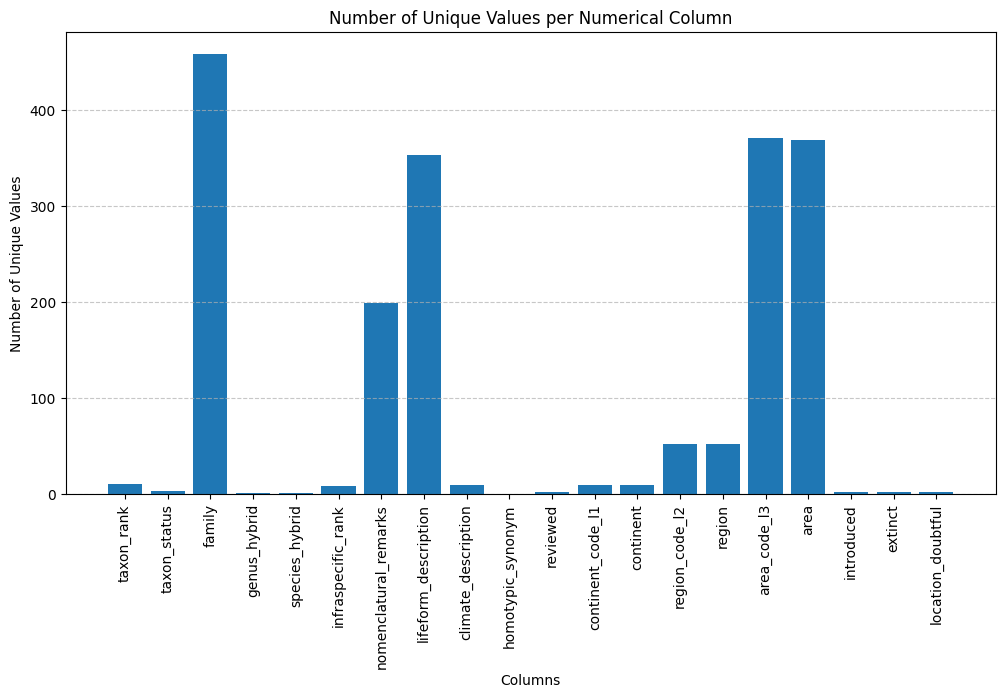

In [25]:
import matplotlib.pyplot as plt

# Calculate the number of unique values per numerical column
numerical_df = df
unique_counts = numerical_df.nunique()

# Filter out columns with more than 1000 unique values
filtered_unique_counts = unique_counts[unique_counts <= 500]

# # Sort in descending order
# filtered_unique_counts = filtered_unique_counts.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_unique_counts.index, filtered_unique_counts.values)

# Labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values per Numerical Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [61]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}' has unique values: {values[:10]}")  # Displaying up to 10 unique values for brevity

Column 'plant_name_id' has unique values: [3011086  108386 3052127 3302520 2902742 2954509 2489731 2795948 3079225
 2949236]
Column 'ipni_id' has unique values: ['60473329-2' '972411-1' '1053324-2' '77333177-1' '77111840-1' '209136-2'
 '232488-2' '94947-2' '77083878-1' '988938-1']
Column 'taxon_rank' has unique values: ['Species' 'Variety' 'Subspecies' 'nothosubsp.' 'Form' 'Genus' 'nothovar.'
 'Subvariety' 'nothof.' 'modif.']
Column 'taxon_status' has unique values: ['Accepted' 'Unplaced' 'Local Biotype']
Column 'family' has unique values: ['Pittosporaceae' 'Rubiaceae' 'Asteraceae' 'Apocynaceae' 'Gesneriaceae'
 'Rosaceae' 'Cucurbitaceae' 'Polygonaceae' 'Boraginaceae' 'Poaceae']
Column 'genus_hybrid' has unique values: [nan '×']
Column 'genus' has unique values: ['Rhytidosporum' 'Larsenaikia' 'Vernonanthura' 'Chthamalia' 'Oreocharis'
 'Potentilla' 'Selysia' 'Eriogonum' 'Nesampelos' 'Geum']
Column 'species_hybrid' has unique values: [nan '×']
Column 'species' has unique values: ['procumb

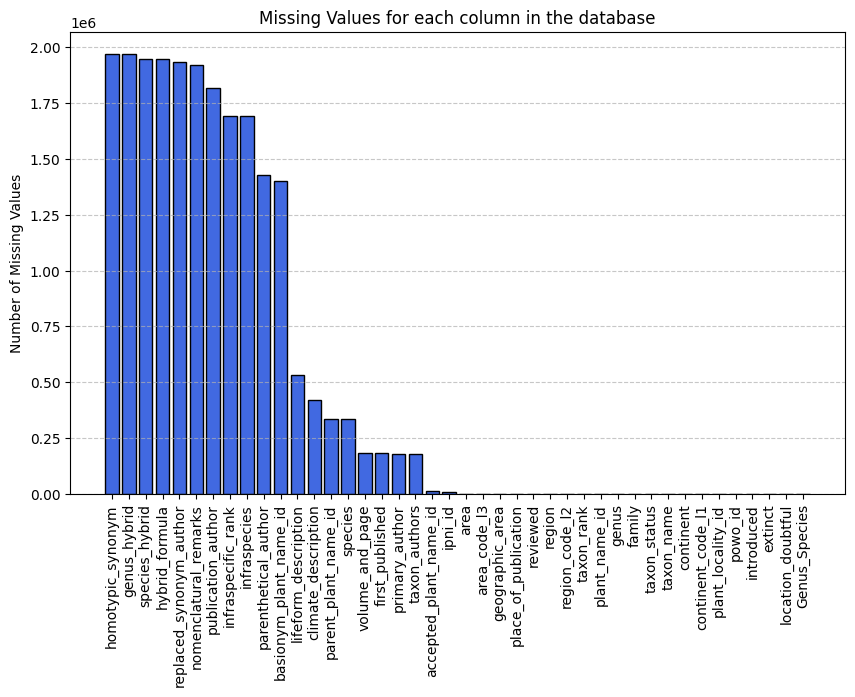

In [24]:
missing_values = df.isnull().sum()

# Sorting the filtered missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

# Plotting the sorted histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_missing_values.index, sorted_missing_values.values, color='royalblue', edgecolor='black')
plt.ylabel("Number of Missing Values")
plt.title("Missing Values for each column in the database")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.savefig("..\\..\\mkdocs\\docs\\imgs\\missing_values.png")
plt.show()


C:\Users\mandr\AppData\Local\Temp\ipykernel_9276\1573058414.py:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



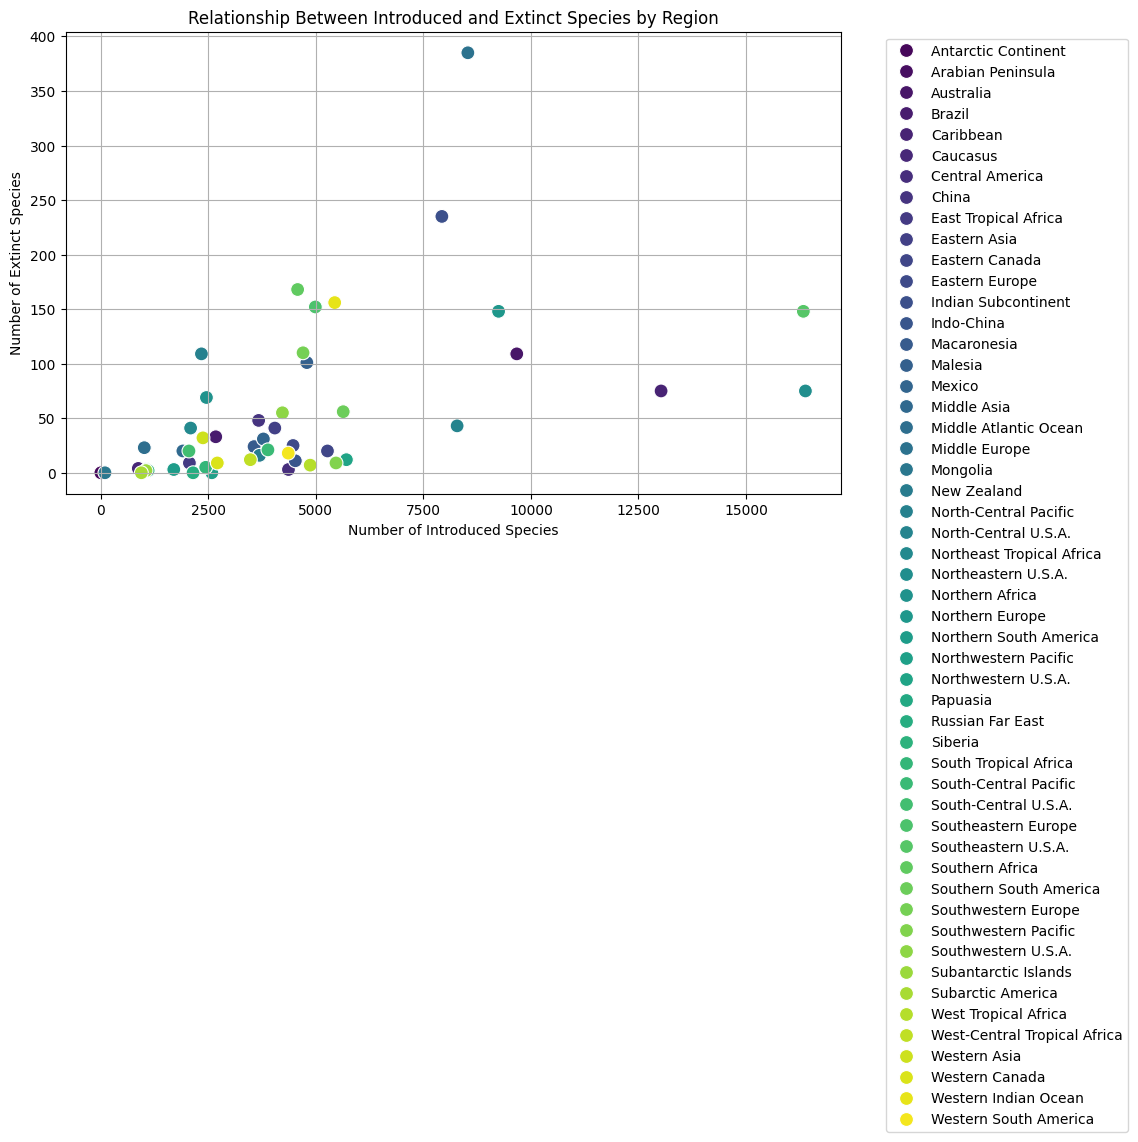

In [36]:
import seaborn as sns

region_stats = df.groupby('region').agg(
    num_introduced=('introduced', 'sum'),  # Sum of introduced species (1 = introduced)
    num_extinct=('extinct', 'sum')         # Sum of extinct species (1 = extinct)
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_introduced', y='num_extinct', data=region_stats, hue='region', palette='viridis', s=100)
plt.title("Relationship Between Introduced and Extinct Species by Region")
plt.xlabel("Number of Introduced Species")
plt.ylabel("Number of Extinct Species")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()

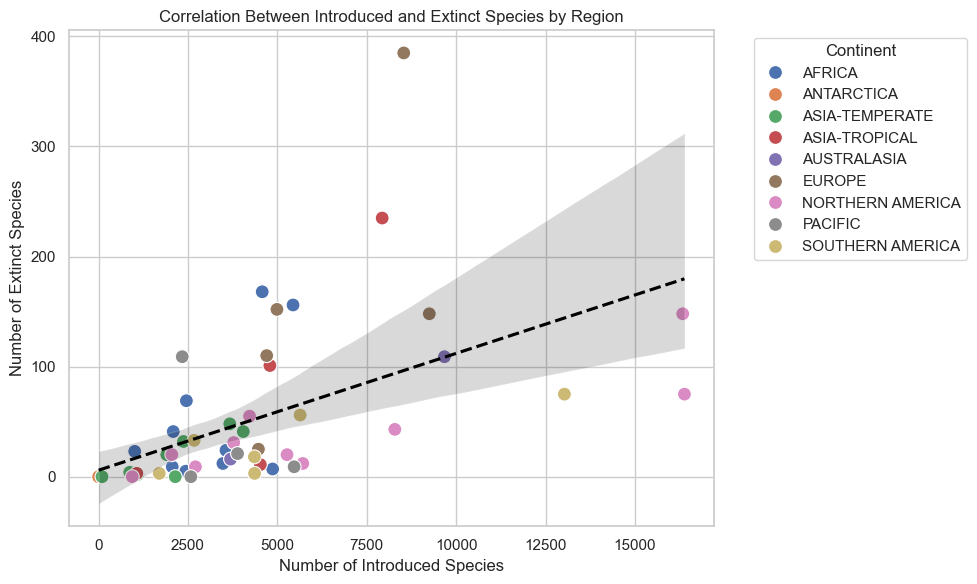

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' has a 'continent' column that maps each region to a continent
region_stats = df.groupby(['continent', 'region']).agg(
    num_introduced=('introduced', 'sum'),  
    num_extinct=('extinct', 'sum')        
).reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot each region with color based on continent
sns.scatterplot(x='num_introduced', y='num_extinct', data=region_stats, hue='continent', s=100)

#Linear regression
sns.regplot(x='num_introduced', y='num_extinct', data=region_stats, scatter=False, color='black', line_kws={"linestyle": "dashed"})

plt.title("Correlation Between Introduced and Extinct Species by Region")
plt.xlabel("Number of Introduced Species")
plt.ylabel("Number of Extinct Species")

# Show only continent names in the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(unique_labels.values(), unique_labels.keys(), title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
from scipy.stats import kendalltau

# Compute Kendall's Tau correlation
corr, p_value = kendalltau(continent_stats['num_introduced'], continent_stats['num_extinct'])
print(f"Kendall's Tau: {corr:.3f}, p-value: {p_value:.3f}")


Kendall's Tau: 0.778, p-value: 0.002


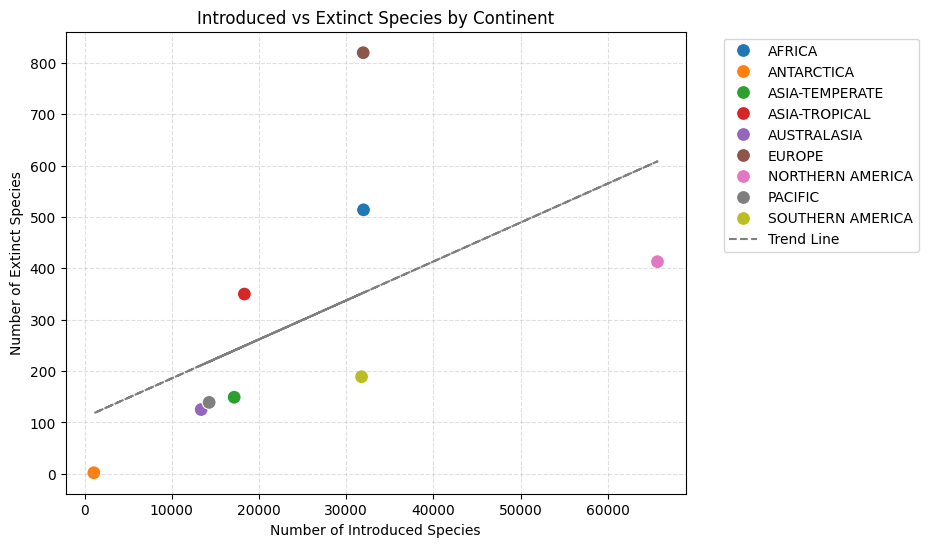

In [73]:
import numpy as np

continent_stats = df.groupby('continent').agg(
    num_introduced=('introduced', 'sum'),
    num_extinct=('extinct', 'sum')
).reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_introduced', y='num_extinct', data=continent_stats, hue='continent', s=100)

# Add linear regression line
x = continent_stats['num_introduced']
y = continent_stats['num_extinct']
m, b = np.polyfit(x, y, 1)  # Fit a linear trendline
plt.plot(x, m*x + b, color='gray', linestyle='dashed', label="Trend Line")

# Labels and legend
plt.title("Introduced vs Extinct Species by Continent")
plt.xlabel("Number of Introduced Species")
plt.ylabel("Number of Extinct Species")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)

# Show plot
plt.show()

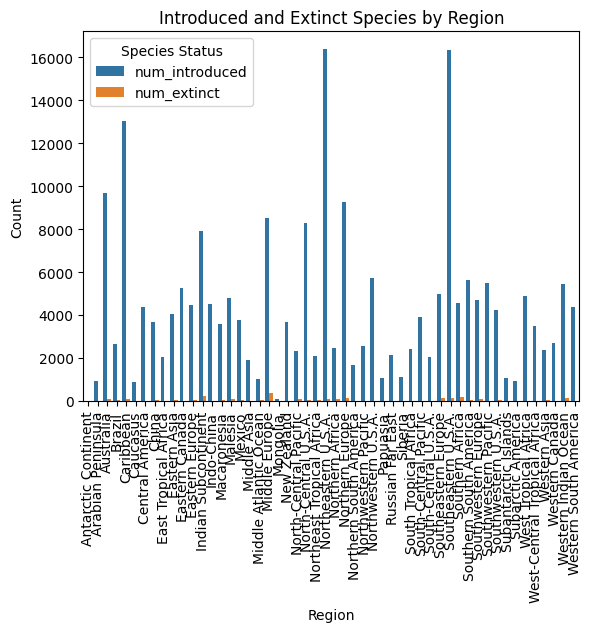

In [41]:
region_stats_melted = region_stats.melt(id_vars=['region'], value_vars=['num_introduced', 'num_extinct'], 
                                        var_name='species_status', value_name='count')
sns.barplot(x='region', y='count', hue='species_status', data=region_stats_melted)
plt.title("Introduced and Extinct Species by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Species Status")
plt.show()

In [51]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
corr, p_value = pearsonr(region_stats['num_introduced'], region_stats['num_extinct'])

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: 0.523
P-value: 0.000


In [63]:
def count_species(location_type, location_name):
    """
    Count the number of species in a specific continent, region, or area.

    Parameters:
        location_type (str): Type of location ('continent', 'region', or 'area').
        location_name (str): Name of the continent, region, or area.

    Returns:
        int: Number of species in the specified location.
    """
    # Validate the location type
    if location_type not in ['continent', 'region', 'area']:
        raise ValueError("Invalid location type. Choose 'continent', 'region', or 'area'.")

    # Filter the dataset based on the location type and name
    if location_type == 'continent':
        filtered_df = df[df['continent'] == location_name]
    elif location_type == 'region':
        filtered_df = df[df['region'] == location_name]
    elif location_type == 'area':
        filtered_df = df[df['area'] == location_name]

    # Count the number of unique species
    num_species = filtered_df['plant_name_id'].nunique()

    return num_species


continent_name = "SOUTHERN AMERICA"
region_name = "Mexico"
area_name = "Borneo"

print(f"Number of species in continent '{continent_name}': {count_species('continent', continent_name)}")
print(f"Number of species in region '{region_name}': {count_species('region', region_name)}")
print(f"Number of species in area '{area_name}': {count_species('area', area_name)}")

Number of species in continent 'SOUTHERN AMERICA': 126563
Number of species in region 'Mexico': 33152
Number of species in area 'Borneo': 15492


In [92]:
def find_species_locations(species_name):
    """
    Find all locations (continent, region, area) of a specific species.

    Parameters:
        species_name (str): Name of the species.

    Returns:
        list: A list of dictionaries, each containing the continent, region, and area where the species is found.
              Returns an empty list if the species is not found.
    """
    # Filter the dataset for rows where the species name matches
    species_data = df[df['taxon_name'] == species_name]

    # Check if the species exists in the dataset
    if species_data.empty:
        return []

    # Extract the location information
    locations = species_data[['continent', 'region', 'area']].to_dict(orient='records')

    return locations

# Example usage:
species_name = "Hieracium murorum"
locations = find_species_locations(species_name)

if locations:
    print(f"Locations of species '{species_name}':")
    for location in locations:
        print(location)
else:
    print(f"Species '{species_name}' not found in the dataset.")


Locations of species 'Hieracium murorum':
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Denmark'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Finland'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Great Britain'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Iceland'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Ireland'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Norway'}
{'continent': 'EUROPE', 'region': 'Northern Europe', 'area': 'Sweden'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Austria'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Belgium'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Czechoslovakia'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Germany'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Hungary'}
{'continent': 'EUROPE', 'region': 'Middle Europe', 'area': 'Netherlands'}
{'continent': 'EURO

In [58]:
print(df.columns)

Index(['plant_name_id', 'ipni_id', 'taxon_rank', 'taxon_status', 'family',
       'genus_hybrid', 'genus', 'species_hybrid', 'species',
       'infraspecific_rank', 'infraspecies', 'parenthetical_author',
       'primary_author', 'publication_author', 'place_of_publication',
       'volume_and_page', 'first_published', 'nomenclatural_remarks',
       'geographic_area', 'lifeform_description', 'climate_description',
       'taxon_name', 'taxon_authors', 'accepted_plant_name_id',
       'basionym_plant_name_id', 'replaced_synonym_author',
       'homotypic_synonym', 'parent_plant_name_id', 'powo_id',
       'hybrid_formula', 'reviewed', 'plant_locality_id', 'continent_code_l1',
       'continent', 'region_code_l2', 'region', 'area_code_l3', 'area',
       'introduced', 'extinct', 'location_doubtful', 'Genus_Species'],
      dtype='object')


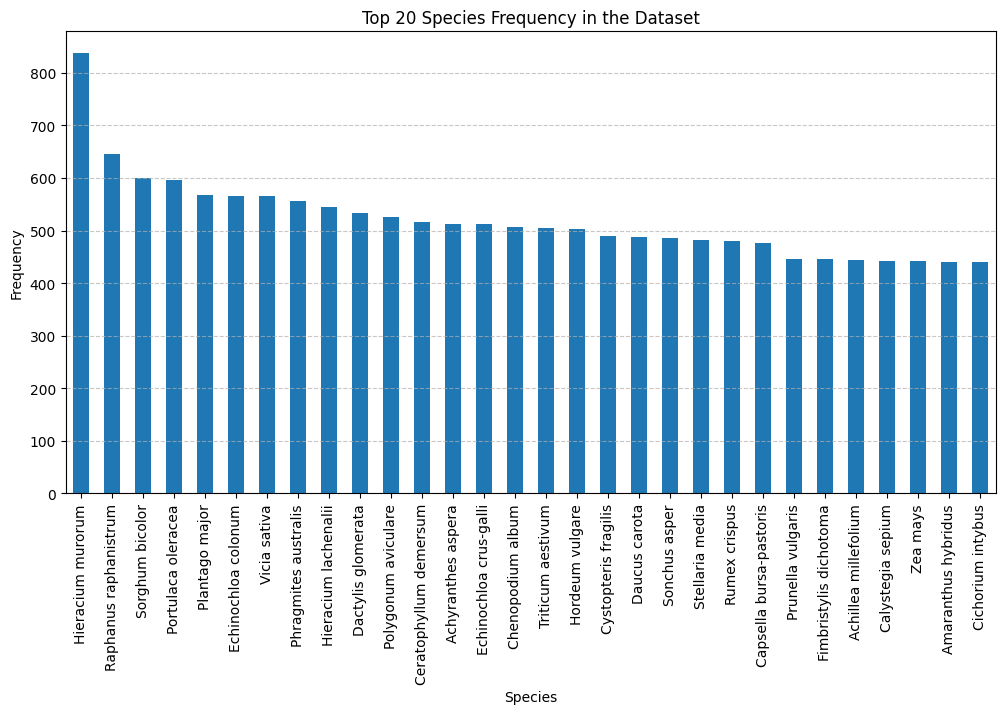

In [93]:
import matplotlib.pyplot as plt

# Count the frequency of each species
species_counts = df['Genus_Species'].value_counts().head(30)  # Display top 20 species for better visualization

# Plot
plt.figure(figsize=(12, 6))
species_counts.plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.title("Top 20 Species Frequency in the Dataset")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [91]:
filtered_df = df[df['species_full_name'] == 'Hieracium murorum']
filtered_df

,plant_name_id,ipni_id,taxon_rank,taxon_status,family,genus_hybrid,genus,species_hybrid,species,infraspecific_rank,...,continent,region_code_l2,region,area_code_l3,area,introduced,extinct,location_doubtful,Genus_Species,species_full_name
21854,3285219,NaN,Subspecies,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,subsp.,...,EUROPE,11.0,Middle Europe,AUT,Austria,0,0,0,Hieracium murorum,Hieracium murorum
21855,3285219,NaN,Subspecies,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,subsp.,...,EUROPE,11.0,Middle Europe,CZE,Czechoslovakia,0,0,0,Hieracium murorum,Hieracium murorum
21856,3285219,NaN,Subspecies,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,subsp.,...,EUROPE,11.0,Middle Europe,POL,Poland,0,0,0,Hieracium murorum,Hieracium murorum
21857,3285219,NaN,Subspecies,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,subsp.,...,EUROPE,11.0,Middle Europe,SWI,Switzerland,0,0,0,Hieracium murorum,Hieracium murorum
21858,3285219,NaN,Subspecies,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,subsp.,...,EUROPE,13.0,Southeastern Europe,ITA,Italy,0,0,0,Hieracium murorum,Hieracium murorum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162582,3067808,30008848-2,Species,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,NaN,...,NORTHERN AMERICA,75.0,Northeastern U.S.A.,NWH,New Hampshire,1,0,0,Hieracium murorum,Hieracium murorum
1162583,3067808,30008848-2,Species,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,NaN,...,NORTHERN AMERICA,75.0,Northeastern U.S.A.,NWJ,New Jersey,1,0,0,Hieracium murorum,Hieracium murorum
1162584,3067808,30008848-2,Species,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,NaN,...,NORTHERN AMERICA,75.0,Northeastern U.S.A.,NWY,New York,1,0,0,Hieracium murorum,Hieracium murorum
1162585,3067808,30008848-2,Species,Accepted,Asteraceae,NaN,Hieracium,NaN,murorum,NaN,...,NORTHERN AMERICA,75.0,Northeastern U.S.A.,PEN,Pennsylvania,1,0,0,Hieracium murorum,Hieracium murorum


C:\Users\mandr\AppData\Local\Temp\ipykernel_22924\1527699196.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_introduced_species.values, y=top_10_introduced_species.index, palette="viridis")


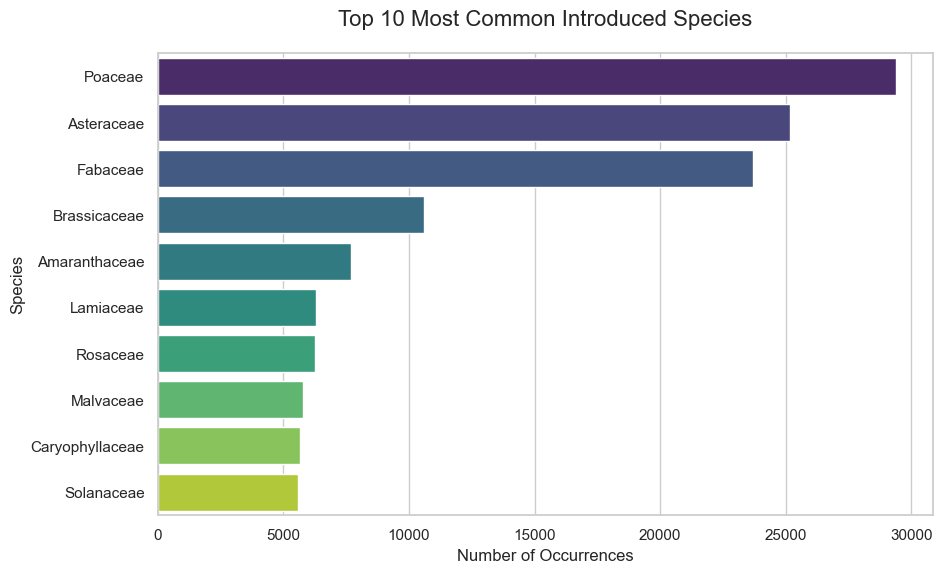

In [33]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for introduced species
introduced_species = df[df["introduced"] == 1]

# Count occurrences of each species
species_counts = introduced_species["family"].value_counts()

# Get the top 10 most common introduced species
top_10_introduced_species = species_counts.head(10)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_introduced_species.values, y=top_10_introduced_species.index, palette="viridis")

# Add labels and title
plt.xlabel("Number of Occurrences", fontsize=12)
plt.ylabel("Species", fontsize=12)
plt.title("Top 10 Most Common Introduced Species", fontsize=16, pad=20)

# Display the plot
plt.show()

C:\Users\mandr\AppData\Local\Temp\ipykernel_22924\226813220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_families.values, y=top_10_families.index, palette="magma")


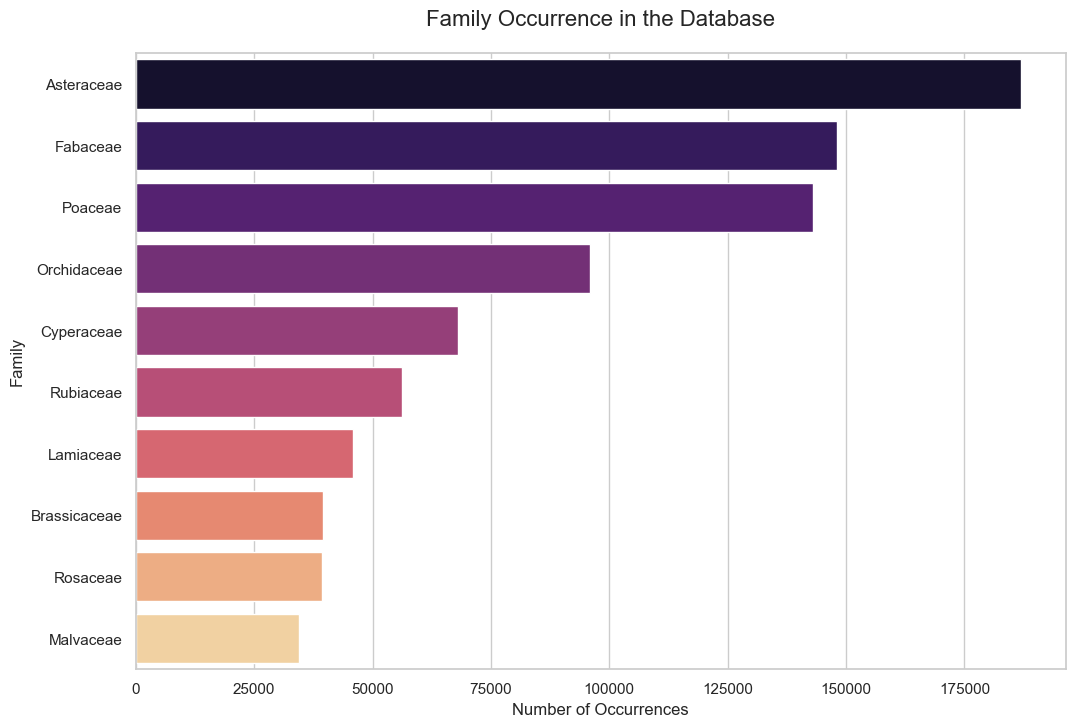

In [14]:
family_counts = df["family"].value_counts()

# Get the top 10 most common families (optional)
top_10_families = family_counts.head(10)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_families.values, y=top_10_families.index, palette="magma")

# Add labels and title
plt.xlabel("Number of Occurrences", fontsize=12)
plt.ylabel("Family", fontsize=12)
plt.title("Family Occurrence in the Database", fontsize=16, pad=20)

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

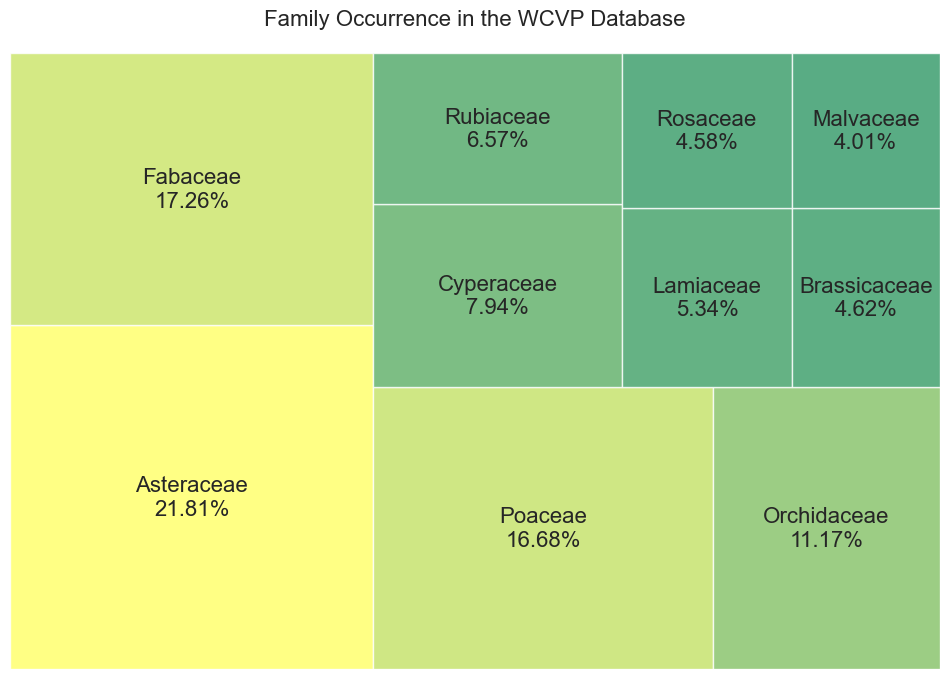

In [30]:
import squarify 
family_counts = df["family"].value_counts()

top_families = family_counts.head(10)

# Convert to a DataFrame for easier plotting
family_df = top_families.reset_index()
family_df.columns = ["Family", "Count"]

# Calculate percentages
total_count = family_df["Count"].sum()
family_df["Percentage"] = (family_df["Count"] / total_count * 100).round(2)
plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))

# Create labels with family name and percentage
labels = [f"{family}\n{percentage}%" for family, percentage in zip(family_df["Family"], family_df["Percentage"])]

# Create the treemap
squarify.plot(
    sizes=family_df["Count"],  # Sizes of the rectangles
    label=labels,  # Labels with family name and percentage
    color=plt.cm.summer(family_df["Count"] / max(family_df["Count"])),  # Color gradient
    alpha=0.8,  # Transparency of the rectangles
    text_kwargs={"fontsize": 16}  # Font size for labels
)

# Add a title
plt.title("Family Occurrence in the WCVP Database", fontsize=16, pad=20)

# Remove axes for a cleaner look
plt.axis("off")

# Display the plot
plt.show()

In [38]:
df.head()


,plant_name_id,ipni_id,taxon_rank,taxon_status,family,genus_hybrid,genus,species_hybrid,species,infraspecific_rank,...,continent,region_code_l2,region,area_code_l3,area,introduced,extinct,location_doubtful,Genus_Species,year
0,3011086,60473329-2,Species,Accepted,Pittosporaceae,NaN,Rhytidosporum,NaN,procumbens,NaN,...,AUSTRALASIA,50.0,Australia,NSW,New South Wales,0,0,0,Rhytidosporum procumbens,NaN
1,3011086,60473329-2,Species,Accepted,Pittosporaceae,NaN,Rhytidosporum,NaN,procumbens,NaN,...,AUSTRALASIA,50.0,Australia,QLD,Queensland,0,0,0,Rhytidosporum procumbens,NaN
2,3011086,60473329-2,Species,Accepted,Pittosporaceae,NaN,Rhytidosporum,NaN,procumbens,NaN,...,AUSTRALASIA,50.0,Australia,SOA,South Australia,0,0,0,Rhytidosporum procumbens,NaN
3,3011086,60473329-2,Species,Accepted,Pittosporaceae,NaN,Rhytidosporum,NaN,procumbens,NaN,...,AUSTRALASIA,50.0,Australia,TAS,Tasmania,0,0,0,Rhytidosporum procumbens,NaN
4,3011086,60473329-2,Species,Accepted,Pittosporaceae,NaN,Rhytidosporum,NaN,procumbens,NaN,...,AUSTRALASIA,50.0,Australia,VIC,Victoria,0,0,0,Rhytidosporum procumbens,NaN
